In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
flood_comm_df = pd.read_csv('311_data/flood_calls_311_comm.csv')
flood_comm_df.head()

,Created Date,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
0,2000-01-01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2000-01-03,0,0,0,4,1,4,1,1,1,...,1,0,0,0,0,0,2,1,2,2
3,2000-01-04,0,0,0,0,1,4,1,0,0,...,3,0,0,1,0,0,0,0,1,1
4,2000-01-05,0,0,0,1,1,3,0,0,0,...,1,0,1,1,0,0,1,0,1,1


In [3]:
flood_comm_df['Created Date'] = pd.to_datetime(flood_comm_df['Created Date'])
flood_comm_df = flood_comm_df.set_index(pd.DatetimeIndex(flood_comm_df['Created Date']))
flood_comm_df = flood_comm_df[flood_comm_df.columns.values[1:]]
flood_comm_df.head()

,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
2000-01-01,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-02,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,1,0,0
2000-01-03,0,0,0,4,1,4,1,1,1,0,...,1,0,0,0,0,0,2,1,2,2
2000-01-04,0,0,0,0,1,4,1,0,0,0,...,3,0,0,1,0,0,0,0,1,1
2000-01-05,0,0,0,1,1,3,0,0,0,1,...,1,0,1,1,0,0,1,0,1,1


In [4]:
# Get the sum for each day, plot over time
flood_comm_sum = flood_comm_df.sum(axis=1)
flood_comm_sum.head()

2000-01-01     5
2000-01-02     3
2000-01-03    56
2000-01-04    34
2000-01-05    34
dtype: int64

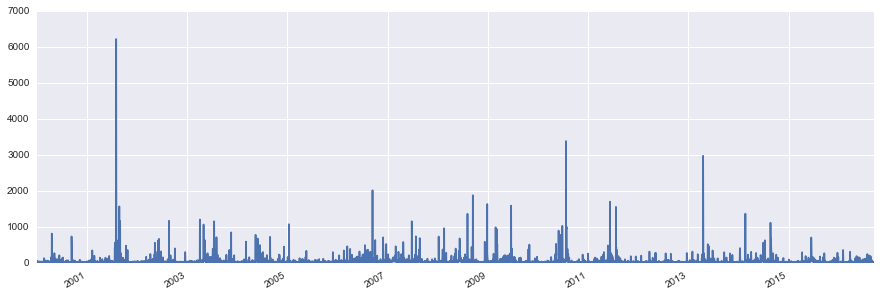

In [5]:
plt.rcParams["figure.figsize"] = [15, 5]
flood_comm_sum.plot()

In [6]:
wib_comm_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
wib_comm_df['Created Date'] = pd.to_datetime(wib_comm_df['Created Date'])
wib_comm_df = wib_comm_df.set_index(pd.DatetimeIndex(wib_comm_df['Created Date']))
wib_comm_df = wib_comm_df[wib_comm_df.columns.values[1:]]
wib_comm_sum = wib_comm_df.sum(axis=1)
wib_comm_sum.head()

2000-01-01     2
2000-01-02     3
2000-01-03    46
2000-01-04    30
2000-01-05    22
dtype: int64

In [7]:
wos_comm_df = pd.read_csv('311_data/wos_calls_311_comm.csv')
wos_comm_df['Created Date'] = pd.to_datetime(wos_comm_df['Created Date'])
wos_comm_df = wos_comm_df.set_index(pd.DatetimeIndex(wos_comm_df['Created Date']))
wos_comm_df = wos_comm_df[wos_comm_df.columns.values[1:]]
wos_comm_sum = wos_comm_df.sum(axis=1)
wos_comm_sum.head()

2000-01-01     3
2000-01-03    10
2000-01-04     4
2000-01-05    12
2000-01-06     8
dtype: int64

## Plots Over Time

From looking at the plot of calls about street vs basement flooding, it looks like people call about street flooding more consistently, but when basement flooding calls happen they're typically in much more severe spikes.

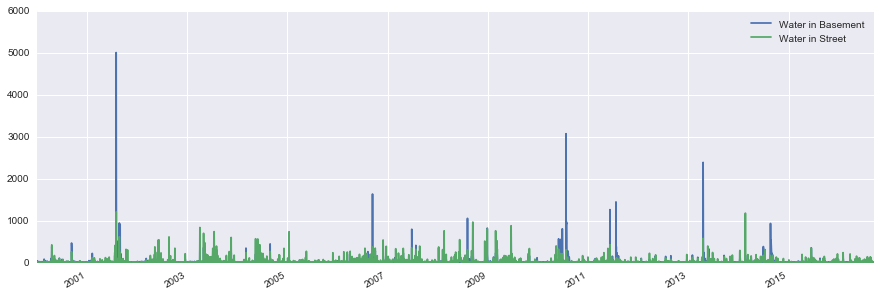

In [8]:
combined_calls = pd.DataFrame()
combined_calls['Water in Basement'] = wib_comm_sum
combined_calls['Water in Street'] = wos_comm_sum
combined_calls.plot()